In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
pd.options.display.max_columns=30
pd.options.display.max_rows=210

In [47]:
cols_nm = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars=pd.read_csv('imports-85.data',names=cols_nm)

In [48]:
cars.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [49]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [50]:
#replace ? with NaN 
numeric_cars=numeric_cars.replace('?',np.NaN)
# convert the columns from object to float
numeric_cars=numeric_cars.astype('float')

In [51]:
numeric_cars=numeric_cars.dropna(subset=['price'])

In [52]:
#tally up bad values
numeric_cars.isna().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [53]:
numeric_cars=numeric_cars.fillna(numeric_cars.mean())

In [54]:
numeric_cars.isna().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [55]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [56]:
#Save price column
price_col=numeric_cars['price']

# Standardize numeric_cars values to 0 - 1 values:
# standardized = (value - min)/(max - min)
numeric_cars=(numeric_cars-numeric_cars.min())/(numeric_cars.max()-numeric_cars.min())

In [57]:
#restore price target and display results
numeric_cars['price']=price_col
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(df,feature_col,target_col,k_val):
    knn=KNeighborsRegressor(n_neighbors=k_val)
    np.random.seed(1)
    
    #shuffle dataframe using .loc
    df=df.loc[np.random.permutation(df.index.values)]    
    
    #split dataframes into train/test using .iloc
    row_50pct=int(round(df.shape[0]*.5,0))
    train=df.iloc[0:row_50pct]
    test=df.iloc[row_50pct:]
    #double brackets is df, single brackets is series
    knn.fit(train[[feature_col]],train[target_col])
    predictions=knn.predict(test[[feature_col]])
    mse=mean_squared_error(test[target_col],predictions)
    rmse=mse**.5
    return rmse

In [59]:
#test function: knn_train_test()
feature_col='bore'
target_col='price'
result=knn_train_test(numeric_cars,feature_col,target_col,5)
result

6780.627784685976

In [60]:
#find best feature
feat_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

rmse_dict={}
for feat_col in feat_cols:
    rmse_dict[feat_col]=knn_train_test(numeric_cars,feat_col,target_col,5)

In [61]:
#convert error dict to Series
rmse_series=pd.Series(rmse_dict)

In [62]:
#Summarize rmse error by feature
print('k=5.  Best column for predicting price is engine-size and then hp:')
rmse_series.sort_values()

k=5.  Best column for predicting price is engine-size and then hp:


engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [63]:
#need to incorporate multi-k values into knn_train_test()
k_vals=[1,3,5,7,9]
for k_val in k_vals:
    print(knn_train_test(numeric_cars,'horsepower','price',k_val))

4170.054848037801
4020.8492630885394
4037.0377131537603
4353.811860277134
4515.135617419103


In [64]:
k_values=[1,3,5,7,9]

def knn_train_test2(df,feature_col,target_col,k_values):
    np.random.seed(1)
    #shuffle dataframe using .loc
    df=df.loc[np.random.permutation(df.index.values)]    
    
    #split dataframes into train/test using .iloc
    row_50pct=int(round(df.shape[0]*.5,0))
    train=df.iloc[0:row_50pct]
    test=df.iloc[row_50pct:]
    
    #By k_values - create knn, fit knn, predict, and rmse
    rmse_by_k={}
    
    for k in k_values:
        knn=KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[[feature_col]],train[target_col])
        predictions=knn.predict(test[[feature_col]])
        mse=mean_squared_error(test[target_col],predictions)
        rmse=mse**.5
        rmse_by_k[k]=rmse
    return rmse_by_k

print('Feature RMSE by k:')
#FIND BEST FEATURE BY k: iterates over features and k_values
feat_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

feat_k_rmse={}
for feat_col in feat_cols:
    feat_k_rmse[feat_col]=knn_train_test2(numeric_cars,feat_col,'price',k_values)
feat_k_rmse

Feature RMSE by k:


{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885

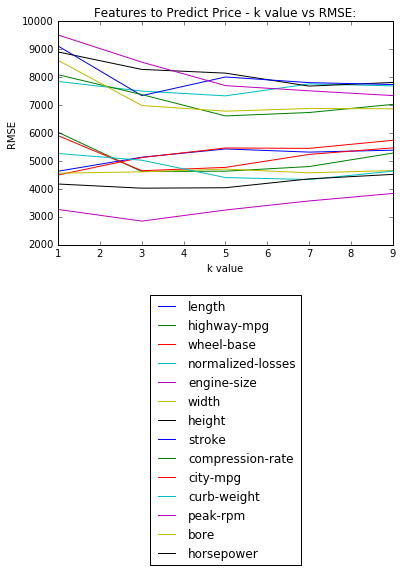

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

legend_list=[]

for key, value in feat_k_rmse.items():
    x=[1,3,5,7,9]
    #get nested dictionary value in order: dict[feature][k]
    y=[feat_k_rmse[key][i] for i in x]
    plt.plot(x,y)
    plt.title('Features to Predict Price - k value vs RMSE:')
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    legend_list.append(key)
plt.legend(legend_list,loc='upper center',bbox_to_anchor=(0.5, -0.2))

plt.show()

In [66]:
feat_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
k_values=[5]

import collections

#Enhance knn_train_test3 with OrderedDict

def knn_train_test3(df,feature_cols,target_col,k_values):
    np.random.seed(1)
    #shuffle dataframe using .loc
    df=df.loc[np.random.permutation(df.index.values)]    
    
    #split dataframes into train/test using .iloc
    row_50pct=int(round(df.shape[0]*.5,0))
    train=df.iloc[0:row_50pct]
    test=df.iloc[row_50pct:]
    
    #Create Ordered Dictionary - remembers order of the added contents
    rmse_by_k=collections.OrderedDict()
    
    #By k_values - create knn, fit knn, predict, and rmse    
    for k in k_values:
        knn=KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[feature_cols],train[target_col])
        predictions=knn.predict(test[feature_cols])
        mse=mean_squared_error(test[target_col],predictions)
        rmse=mse**.5
        rmse_by_k[k]=rmse
    return rmse_by_k

#feat_cols is passed as list.  So train/test of features is
#Dataframe format, NOT a list. df[['a','b']] not
#df [[['a','b']]]
result3=knn_train_test3(numeric_cars,feat_cols,'price',k_values)
print('Default k=5 and ALL features:')
result3

Default k=5 and ALL features:


OrderedDict([(5, 3726.6377183145073)])

In [67]:
k_values=[5]
print('Best Features by RMSE.  k=5:','\n')

feat_cols_2 = ['engine-size','horsepower']
best2=knn_train_test3(numeric_cars,feat_cols_2,'price',k_values)
print('Best 2 features:',best2)

feat_cols_3 = ['engine-size','horsepower','width']
best3=knn_train_test3(numeric_cars,feat_cols_3,'price',k_values)
print('Best 3 features:',best3)

feat_cols_4 = ['engine-size','horsepower','width','curb-weight']
best4=knn_train_test3(numeric_cars,feat_cols_4,'price',k_values)
print('Best 4 features:',best4)

feat_cols_5 = ['engine-size','horsepower','width','curb-weight','highway-mpg']
best5=knn_train_test3(numeric_cars,feat_cols_5,'price',k_values)
print('Best 5 features:',best5)

Best Features by RMSE.  k=5: 

Best 2 features: OrderedDict([(5, 2949.8817277180374)])
Best 3 features: OrderedDict([(5, 3580.7376651928435)])
Best 4 features: OrderedDict([(5, 3487.340917327035)])
Best 5 features: OrderedDict([(5, 3410.2170133901805)])


In [68]:
#TOP 3 MODELS ARE: BEST 2, BEST 4, AND BEST 5
#RUN TOP 3 MODELS FOR k is 1-25:

k_values=list(range(1,25,1))

feat_cols_2 = ['engine-size','horsepower']
best2=knn_train_test3(numeric_cars,feat_cols_2,'price',k_values)
print('Best 2 features. k is 1-25:')
best2

Best 2 features. k is 1-25:


OrderedDict([(1, 2783.6204237227344),
             (2, 2657.7963807419765),
             (3, 2792.586573031673),
             (4, 2891.5329686923255),
             (5, 2949.8817277180374),
             (6, 3096.402601694776),
             (7, 3164.681969020496),
             (8, 3413.228359192009),
             (9, 3748.6716603306486),
             (10, 4080.7125057341937),
             (11, 4215.6372280600335),
             (12, 4275.421524277872),
             (13, 4373.901683035496),
             (14, 4424.285137239815),
             (15, 4539.505493095937),
             (16, 4667.307671446768),
             (17, 4729.605305844226),
             (18, 4790.556632159094),
             (19, 4824.3866193292615),
             (20, 4840.850914693829),
             (21, 4837.429062000271),
             (22, 4831.16988267597),
             (23, 4861.679492959275),
             (24, 4903.346008862579)])

In [69]:
k_values=list(range(1,25,1))

feat_cols_4 = ['engine-size','horsepower','width','curb-weight']
best4=knn_train_test3(numeric_cars,feat_cols_4,'price',k_values)
print('Best 4 features. k is 1-25:')
best4

Best 4 features. k is 1-25:


OrderedDict([(1, 2952.725686581471),
             (2, 3131.704952720018),
             (3, 3129.692821910155),
             (4, 3241.4320776448717),
             (5, 3487.340917327035),
             (6, 3637.0381471429987),
             (7, 3606.195077860286),
             (8, 3809.9307026308247),
             (9, 3875.274902378068),
             (10, 3997.1583055842293),
             (11, 4162.564050411074),
             (12, 4289.486490995821),
             (13, 4368.061602779942),
             (14, 4416.304772968801),
             (15, 4434.013914355171),
             (16, 4441.4634909198785),
             (17, 4512.996303789127),
             (18, 4523.575629742228),
             (19, 4534.834065236792),
             (20, 4620.211598150367),
             (21, 4688.356509517293),
             (22, 4731.46717779913),
             (23, 4763.535312989311),
             (24, 4751.601375872476)])

In [70]:
k_values=list(range(1,25,1))

feat_cols_5 = ['engine-size','horsepower','width','curb-weight','highway-mpg']
best5=knn_train_test3(numeric_cars,feat_cols_5,'price',k_values)
print('Best 5 features. k is 1-25:')
best5

Best 5 features. k is 1-25:


OrderedDict([(1, 2824.7061233282866),
             (2, 2915.6731645496975),
             (3, 3012.4204546509704),
             (4, 3202.8876051367483),
             (5, 3410.2170133901805),
             (6, 3618.4509432660384),
             (7, 3622.6290209234803),
             (8, 3848.635835654326),
             (9, 3977.8149139381726),
             (10, 3994.8132211260104),
             (11, 4159.843526607947),
             (12, 4294.3389473154875),
             (13, 4380.848359486949),
             (14, 4466.368754416089),
             (15, 4522.420711094978),
             (16, 4536.427578452413),
             (17, 4587.098443664006),
             (18, 4622.107837952761),
             (19, 4612.890107622797),
             (20, 4632.693976139521),
             (21, 4712.917548435062),
             (22, 4676.301064518744),
             (23, 4691.189310956096),
             (24, 4755.990767231825)])

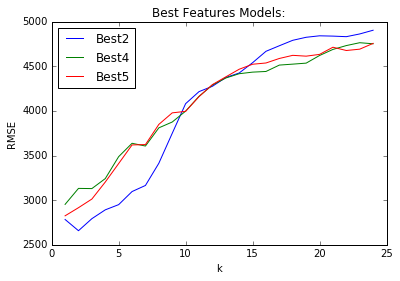

In [71]:
#Plot all the Best Features models: Best 2, Best 4, Best 5
#We could also combine results into a big dictionary, like
#what was done for the features.

x=list(best2.keys())
y=list(best2.values())
plt.plot(x,y)

x=list(best4.keys())
y=list(best4.values())
plt.plot(x,y)

x=list(best5.keys())
y=list(best5.values())
plt.plot(x,y)

plt.title('Best Features Models:')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.legend(['Best2','Best4','Best5'],loc='upper left')

plt.show()

In [75]:
#Best k for Top 3 models
print('Best k for Top 3 models:','\n')
print('Best k for 2 features:',min(best2,key=best2.get))
print('Best k for 4 features:',min(best4,key=best4.get))
print('Best k for 5 features:',min(best5,key=best5.get))
print('\n')
print('Low k neighbors tend to produce lower RMSES because')
print('there are fewer distances and less chance of outliers.')

Best k for Top 3 models: 

Best k for 2 features: 2
Best k for 4 features: 1
Best k for 5 features: 1


Low k neighbors tend to produce lower RMSES because
there are fewer distances and less chance of outliers.
